# Regolarizzazione: Esercitazione

Per questa esercitazione dovrai verificare la presenza di overfitting e regolarizzare un modello di regressione polinomiale di secondo grado. Il modello utilizzerà il Boston Housing Dataset, che puoi scaricare [da qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing.csv), per stimare il valore di abitazioni.

Il modello dovrà avere:

1. Un R2 sul set di test di almeno 0.75.
2. Un R2 calcolato tramite cross validation di almeno 0.8.

Inoltre, la differenza tra R2 sul set di addestramento e sul set di test deve essere inferiore del 15% (ad esempio, per un R2 sul set di addestramento di 1, l'R2 sul set di test non deve essere inferiore a 0.85).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

In [2]:
SEED = 0

In [3]:
URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"

df = pd.read_csv(URL+"housing.csv", index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop("PRICE", axis=1).values
X.shape

(506, 13)

In [5]:
y = df["PRICE"].values
y.shape

(506,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

In [7]:
poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
def evaluate_model(model, dataset):
    
    X, y = dataset
    y_pred = model.predict(X)
    
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
    print(f"R2: {r2_score(y, y_pred):.3f}")

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
evaluate_model(lr, (X_train, y_train))

RMSE: 2.025
R2: 0.952


In [12]:
evaluate_model(lr, (X_test, y_test))

RMSE: 5.480
R2: 0.639


In [13]:
model = Ridge(alpha=10.)
model.fit(X_train, y_train)

Ridge(alpha=10.0)

In [14]:
evaluate_model(model, (X_train, y_train))

RMSE: 2.965
R2: 0.896


In [15]:
evaluate_model(model, (X_test, y_test))

RMSE: 4.142
R2: 0.794


In [16]:
model = Lasso(alpha=.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [17]:
evaluate_model(model, (X_train, y_train))

RMSE: 3.438
R2: 0.861


In [18]:
evaluate_model(model, (X_test, y_test))

RMSE: 4.393
R2: 0.768


In [19]:
train_score = []
test_score = []

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

for train_index, test_index in kf.split(X):
  
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly = PolynomialFeatures(degree=2)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model = Ridge(alpha=10.)
    model.fit(X_train, y_train)

    r2_train = r2_score(y_train, model.predict(X_train))
    train_score.append(r2_train)

    r2_test = r2_score(y_test, model.predict(X_test))
    test_score.append(r2_test)

scores = {
      "train_score":np.array(train_score),
      "test_score":np.array(test_score)
    }

scores

{'train_score': array([0.89858548, 0.87456691, 0.88444049, 0.88023313, 0.86559558]),
 'test_score': array([0.74015424, 0.87635598, 0.78849861, 0.84387288, 0.90073191])}

In [20]:
scores["train_score"].mean()

0.880684319262737

In [21]:
scores["test_score"].mean()

0.8299227228169472

In [22]:
sns.set_theme()

In [23]:
train_size_abs, train_scores, test_scores = learning_curve(
    Ridge(alpha=10.),
    X,
    y,
    random_state=SEED
)

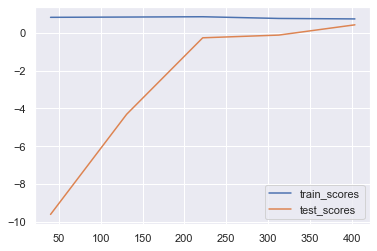

In [24]:
plt.plot(train_size_abs, train_scores.mean(axis=1), label= "train_scores")
plt.plot(train_size_abs, test_scores.mean(axis=1), label= "test_scores")
plt.legend()
plt.show()